# Exercise 1, Data science
### Task 1, Section a

In [121]:
import pandas as pd 
contestants_df = pd.read_csv('contestants.csv')


country_id = contestants_df["to_country_id"].unique()
new_table = pd.DataFrame(index=country_id)

new_table['Name_Country'] = contestants_df.groupby('to_country_id')['to_country'].first()
new_table['Num_of_Competitions'] = contestants_df.groupby('to_country_id')['to_country'].count()
new_table['Median_Final'] = contestants_df.groupby('to_country_id')['place_final'].median()

winners = contestants_df[contestants_df['place_final'] == 1]
new_table['Num_Of_Wins'] = winners['to_country_id'].value_counts().reindex(country_id, fill_value=0)
new_table['Win_Percentage'] = (new_table['Num_Of_Wins'] / new_table['Num_of_Competitions'])*100
new_table.sort_values('Win_Percentage', ascending=False)


,Name_Country,Num_of_Competitions,Median_Final,Num_Of_Wins,Win_Percentage
ua,Ukraine,18,6.0,3,16.666667
ie,Ireland,49,7.0,7,14.285714
lu,Luxembourg,37,9.0,5,13.513514
se,Sweden,62,7.0,7,11.290323
il,Israel,40,8.5,4,10.000000
...,...,...,...,...,...
Poland,Poland,8,NaN,0,0.000000
Netherlands,Netherlands,9,NaN,0,0.000000
Ireland,Ireland,9,NaN,0,0.000000
Iceland,Iceland,7,NaN,0,0.000000


### Israel's situation

In [122]:
israel_stats = new_table.loc['il']
israel_stats

Name_Country           Israel
Num_of_Competitions        40
Median_Final              8.5
Num_Of_Wins                 4
Win_Percentage           10.0
Name: il, dtype: object

### Task 1, Section b

In [123]:
performer_counts = contestants_df['performer'].value_counts()
performer_more_than_3 = performer_counts[performer_counts > 3]
print("All performer who participated more than 3 times in the competition:")
print(performer_more_than_3)

All performer who participated more than 3 times in the competition:
performer
Fud Leclerc    4
Name: count, dtype: int64


### Task 1, Section c

In [124]:
composers_counts = contestants_df['composers'].value_counts()
composers_more_than_3 = composers_counts[composers_counts > 3]
print("All composers who composed more than 3 songs for the competition:")
print(composers_more_than_3)

All composers who composed more than 3 songs for the competition:
composers
Ralph Siegel                             22
Peter Reber                               6
Dimitris Kontopoulos;Philipp Kirkorov     6
Lasse Holm                                5
Andrej Babić                              5
Philip Vella                              5
Hubert Giraud                             5
Željko Joksimović                         5
Dimitris Kontopoulos                      4
Marc Paelinck                             4
Brendan J. Graham                         4
Domenico Modugno                          4
André Popp                                4
Rolf Løvland                              4
Géo Voumard                               4
Juan Carlos Calderón                      4
Sven Lõhmus                               4
Udo Jürgens                               4
Nikos Terzis                              4
Søren Bundgaard                           4
Arne Bendiksen                            4


### Task 1, Section d

In [125]:

israel_df = contestants_df[contestants_df['to_country'] == 'Israel']

israel_places_counts = israel_df['place_final'].value_counts().sort_values(ascending=False)

print("Number of times Israel finished in each place:")
print(israel_places_counts)

Number of times Israel finished in each place:
place_final
1.0     4
7.0     3
23.0    3
11.0    2
6.0     2
2.0     2
5.0     2
19.0    2
8.0     2
12.0    2
3.0     2
16.0    2
9.0     2
14.0    2
4.0     2
18.0    1
24.0    1
22.0    1
17.0    1
Name: count, dtype: int64


# Task 2

In [126]:
df1 = contestants_df[['to_country_id', 'to_country']]
df1 = df1.drop_duplicates(subset=['to_country'])
code2country = pd.Series(df1['to_country'].values, index=df1['to_country_id']).to_dict()
code2country

{'ch': 'Switzerland',
 'nl': 'Netherlands',
 'be': 'Belgium',
 'de': 'Germany',
 'fr': 'France',
 'lu': 'Luxembourg',
 'it': 'Italy',
 'dk': 'Denmark',
 'gb': 'United Kingdom',
 'at': 'Austria',
 'se': 'Sweden',
 'mc': 'Monaco',
 'no': 'Norway',
 'yu': 'Yugoslavia',
 'es': 'Spain',
 'fi': 'Finland',
 'pt': 'Portugal',
 'ie': 'Ireland',
 'mt': 'Malta',
 'il': 'Israel',
 'gr': 'Greece',
 'tr': 'Turkey',
 'ma': 'Morocco',
 'cy': 'Cyprus',
 'is': 'Iceland',
 'hr': 'Croatia',
 'ba': 'Bosnia & Herzegovina',
 'si': 'Slovenia',
 'pl': 'Poland',
 'hu': 'Hungary',
 'ru': 'Russia',
 'sk': 'Slovakia',
 'ro': 'Romania',
 'ee': 'Estonia',
 'lt': 'Lithuania',
 'mk': 'North MacedoniaN.Macedonia',
 'lv': 'Latvia',
 'ua': 'Ukraine',
 'cs': 'Serbia & Montenegro',
 'al': 'Albania',
 'Andorra': 'Andorra',
 'Belarus': 'Belarus',
 'md': 'Moldova',
 'Bulgaria': 'Bulgaria',
 'am': 'Armenia',
 'rs': 'Serbia',
 'ge': 'Georgia',
 'Montenegro': 'Montenegro',
 'Czech Republic': 'Czech Republic',
 'az': 'Azerbaijan'

## Task 3:
### Table preparation

In [127]:
votes = pd.read_csv('votes.csv')
votes = votes.loc[votes['round'] == "final"]

votes['to_country_id'] = votes['to_country_id'].replace(code2country)
votes['from_country_id'] = votes['from_country_id'].replace(code2country)

competitions_30 = new_table.loc[new_table['Num_of_Competitions'] >= 30]

votes = votes.loc[votes['from_country_id'].isin(competitions_30['Name_Country'].unique())]
votes = votes.loc[votes['to_country_id'].isin(competitions_30['Name_Country'].unique())]
votes = votes.loc[~((votes['year'] > 1996 ) & (votes['jury_points'].isna()))]
votes.loc[votes['year'] > 1996, 'total_points'] = votes.loc[votes['year'] > 1996, 'jury_points']

votes.rename(columns={"from_country_id" : "from", "to_country_id" : "to", "total_points" : "points"}, inplace=True)
votes.drop(['round','from_country', 'to_country', 'tele_points', 'jury_points'], axis=1, inplace=True)
votes


,year,from,to,points
0,1957,Austria,Netherlands,6
1,1957,Austria,France,0
2,1957,Austria,Denmark,0
3,1957,Austria,Luxembourg,3
4,1957,Austria,Germany,0
...,...,...,...,...
51318,2023,United Kingdom,Spain,5
51321,2023,United Kingdom,Switzerland,0
51324,2023,United Kingdom,Portugal,0
51326,2023,United Kingdom,United Kingdom,0


### Calculation of the average score for each country in each competition

In [128]:
df_average = pd.DataFrame()

df_average = votes.groupby(['year', 'to'])['points'].mean().reset_index()
df_average = df_average.rename(columns={'to': 'country', 'points': 'mean'})
df_average['year.country'] = df_average['year'].astype(str) + '.' + df_average['country']
df_average.set_index('year.country', inplace=True)
df_average


,year,country,mean
year.country,,,
1957.Austria,1957,Austria,0.300000
1957.Belgium,1957,Belgium,0.500000
1957.Denmark,1957,Denmark,1.000000
1957.France,1957,France,1.700000
1957.Germany,1957,Germany,0.800000
...,...,...,...
2023.Portugal,2023,Portugal,1.611111
2023.Spain,2023,Spain,2.500000
2023.Sweden,2023,Sweden,9.277778


### Normalize the score in each row according to the average:

In [129]:
votes = votes.merge(df_average, left_on=['year', 'to'], right_on=['year', 'country'])
votes['adjusted.points'] = votes['points'] - votes['mean']
votes['above.average'] = (votes['adjusted.points'] > 0)
votes.loc[votes['from'] == votes['to'], 'above.average'] = True
votes.drop(['country','mean'], axis=1, inplace=True)
votes




,year,from,to,points,adjusted.points,above.average
0,1957,Austria,Netherlands,6,2.900000,True
1,1957,Austria,France,0,-1.700000,False
2,1957,Austria,Denmark,0,-1.000000,False
3,1957,Austria,Luxembourg,3,2.200000,True
4,1957,Austria,Germany,0,-0.800000,False
...,...,...,...,...,...,...
12296,2023,United Kingdom,Spain,5,2.500000,True
12297,2023,United Kingdom,Switzerland,0,-2.277778,False
12298,2023,United Kingdom,Portugal,0,-1.611111,False
12299,2023,United Kingdom,United Kingdom,0,-0.611111,True


### Creating a matrix

In [130]:
from_to_above_average = pd.DataFrame()
from_to_above_average = votes.groupby(['from', 'to'])['above.average'].mean().unstack(fill_value=0)
from_to_above_average



to,Austria,Belgium,Cyprus,Denmark,Finland,France,Germany,Greece,Ireland,Israel,Italy,Luxembourg,Netherlands,Norway,Portugal,Spain,Sweden,Switzerland,Turkey,United Kingdom
from,,,,,,,,,,,,,,,,,,,,
Austria,1.000000,0.179487,0.142857,0.300000,0.117647,0.487805,0.268293,0.181818,0.666667,0.391304,0.333333,0.387097,0.447368,0.236842,0.151515,0.342105,0.410256,0.473684,0.117647,0.487805
Belgium,0.447368,1.000000,0.300000,0.233333,0.162162,0.386364,0.511111,0.181818,0.580645,0.423077,0.463415,0.305556,0.238095,0.390244,0.222222,0.357143,0.309524,0.404762,0.222222,0.533333
Cyprus,0.315789,0.315789,1.000000,0.250000,0.222222,0.571429,0.238095,1.000000,0.266667,0.277778,0.562500,0.416667,0.222222,0.238095,0.150000,0.409091,0.318182,0.222222,0.000000,0.136364
Denmark,0.387097,0.250000,0.421053,1.000000,0.230769,0.303030,0.529412,0.222222,0.473684,0.142857,0.100000,0.240000,0.266667,0.500000,0.160000,0.133333,0.718750,0.433333,0.062500,0.484848
Finland,0.176471,0.342105,0.400000,0.320000,1.000000,0.384615,0.150000,0.409091,0.266667,0.600000,0.583333,0.375000,0.289474,0.250000,0.222222,0.268293,0.589744,0.315789,0.235294,0.439024
France,0.315789,0.333333,0.200000,0.344828,0.194444,1.000000,0.363636,0.454545,0.333333,0.458333,0.425000,0.411765,0.487805,0.275000,0.514286,0.414634,0.292683,0.341463,0.176471,0.477273
Germany,0.263158,0.348837,0.150000,0.200000,0.189189,0.500000,1.000000,0.000000,0.483871,0.461538,0.341463,0.388889,0.500000,0.365854,0.250000,0.404762,0.452381,0.428571,0.235294,0.377778
Greece,0.409091,0.304348,0.944444,0.176471,0.272727,0.480000,0.160000,1.000000,0.526316,0.045455,0.363636,0.250000,0.363636,0.120000,0.500000,0.538462,0.240000,0.272727,0.000000,0.230769
Ireland,0.400000,0.342857,0.400000,0.333333,0.333333,0.555556,0.405405,0.136364,1.000000,0.480000,0.406250,0.535714,0.529412,0.416667,0.171429,0.263158,0.388889,0.441176,0.176471,0.473684


## Task 4:
### Analysis of results:
#### a:

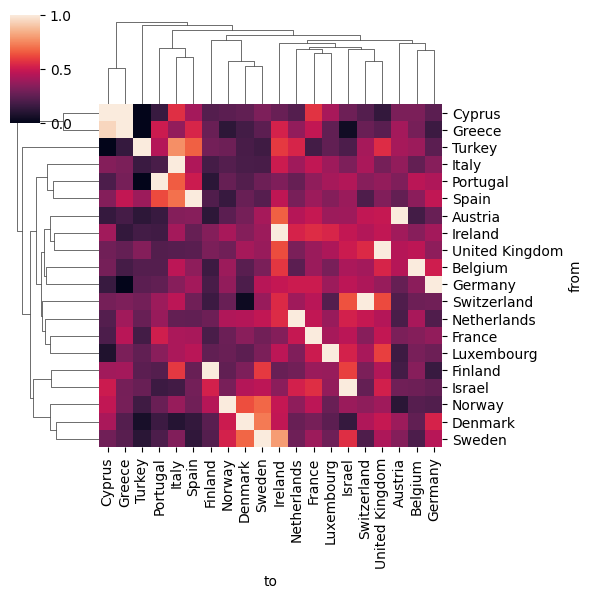

In [131]:
import seaborn as sns 
sns.clustermap(from_to_above_average, figsize=(6,6))




#### b:

C:\Users\omerl\AppData\Local\Temp\ipykernel_24300\610445659.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=israel_column.values, y=israel_column.index, palette='viridis')


Text(0.4082005283781751, 9.5, 'Average: 0.41')

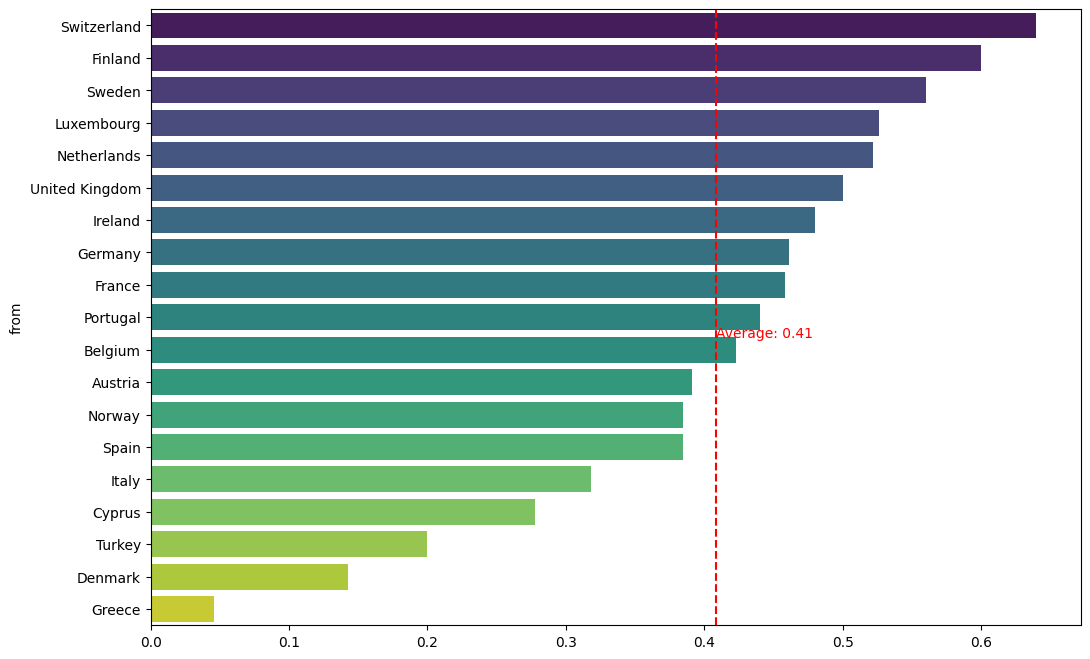

In [132]:
import matplotlib.pyplot as plt
israel_column = from_to_above_average['Israel'].drop('Israel').sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=israel_column.values, y=israel_column.index, palette='viridis')

mean_value = israel_column.mean()
plt.axvline(mean_value, color='r', linestyle='--')
plt.text(mean_value, len(israel_column) / 2, f'Average: {mean_value:.2f}', color='r', va='center')



#### c:

C:\Users\omerl\AppData\Local\Temp\ipykernel_24300\2268495109.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=israel_row.values, y=israel_row.index, palette='viridis')


Text(0.35983221906984403, 9.5, 'Average: 0.36')

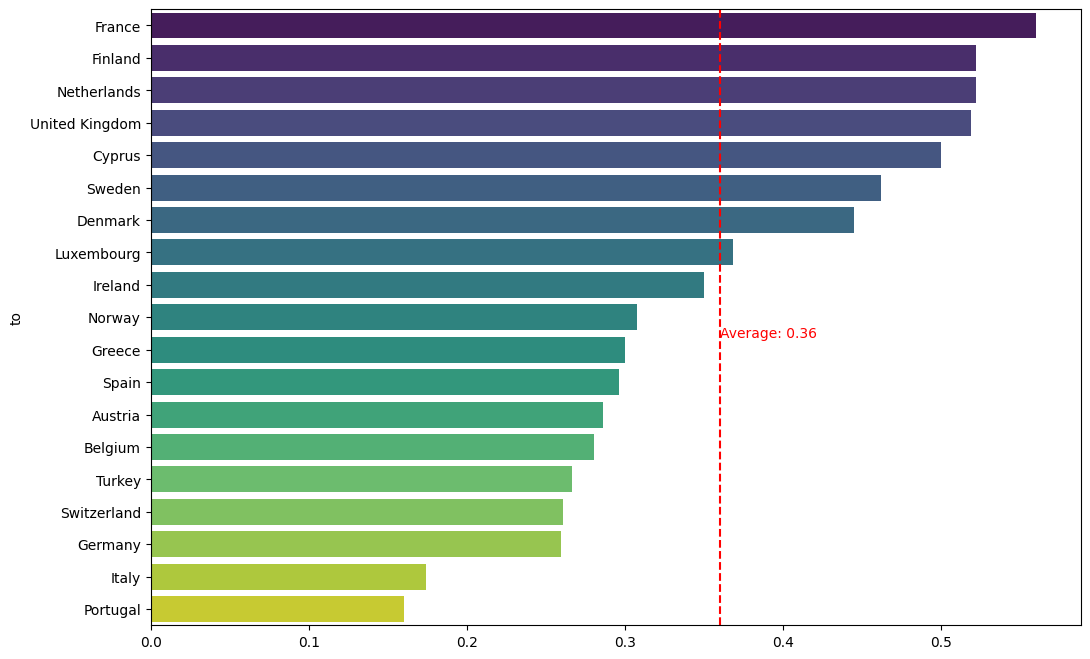

In [133]:
israel_row = from_to_above_average.loc['Israel'].drop('Israel').sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=israel_row.values, y=israel_row.index, palette='viridis')

mean_value = israel_row.mean()
plt.axvline(mean_value, color='r', linestyle='--')
plt.text(mean_value, len(israel_row) / 2, f'Average: {mean_value:.2f}', color='r', va='center')
